<a href="https://colab.research.google.com/github/Nazhan99/Tensorflow_notes/blob/main/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to neural network classification

###Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

#create circles 
X, y =make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
  #check out labels
  y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles=pd.DataFrame({"0X":X[:,0], "X1":X[:,1], "label":y})
circles

,0X,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


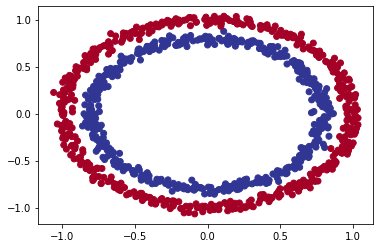

In [5]:
#visualized with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y,  cmap=plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
len(X), len(y)

(1000, 1000)

###Step in modelling

1. create or import a model

2. compile the model

3. fit the model

4. evaluate the model

5. tweak

6. evaluate



In [9]:
import tensorflow as tf

In [10]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [11]:
#set random sed
tf.random.set_seed(42)

#1. create teh model using the Sequential API
model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(1)])

#2. compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


#3. fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
#improve the model by training longer
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [13]:
#step up a notch and add an layer

tf.random.set_seed(42)

model_2= tf.keras.Sequential([
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
model_2.evaluate(X,y)

32/32 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

###Improve our model

1. create a model - might add more layers and hidden units within a layer

2. commpiling the model- might chooose better optimization function

3. fitting the model- might fit the model for more epochs (longer training)



In [16]:
#set the random seed
tf.random.set_seed(42)

#1. create the model(3 layers)
model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100), #add 100 dense neurons
                             tf.keras.layers.Dense(10), #add another layer with 10 neuron
                             tf.keras.layers.Dense(1)
])

#2. compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_3.fit(X,y , epochs=100, verbose=0)

In [17]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [18]:
model_3.predict(X)

array([[0.48793244],
       [0.55887616],
       [0.56292856],
       [0.5705068 ],
       [0.44141158],
       [0.5738823 ],
       [0.5576486 ],
       [0.48246637],
       [0.47755855],
       [0.5750227 ],
       [0.5148492 ],
       [0.53087693],
       [0.5643773 ],
       [0.45787305],
       [0.45052725],
       [0.46129915],
       [0.54055846],
       [0.46380937],
       [0.54798055],
       [0.50375706],
       [0.50630444],
       [0.58775467],
       [0.45902476],
       [0.4912331 ],
       [0.5832161 ],
       [0.57042587],
       [0.5523935 ],
       [0.4631735 ],
       [0.4577342 ],
       [0.4544098 ],
       [0.47872254],
       [0.57856053],
       [0.55546165],
       [0.46339142],
       [0.45849174],
       [0.589867  ],
       [0.57247376],
       [0.529744  ],
       [0.45870548],
       [0.51092875],
       [0.49994174],
       [0.5463086 ],
       [0.5109905 ],
       [0.45797244],
       [0.52232754],
       [0.53888047],
       [0.44872287],
       [0.544

###create a function to visualize the model predictions.

* Take in a trained model, features (X) and labels (y)
* create a meshgrid of different X value
* make prediction across meshgrid
* plot the prediction as well as a line between zone

In [19]:
import numpy as np

In [20]:
def plot_decision_boundary(model, X,y):

  """
  plot the decision boundary created by a model predicting on X.
  """
  
  #define the axis boundaries of the plot and create a meshgrid

  x_min, x_max=X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max=X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(x_min,x_max, 100))

  #create X value for prediction
  x_in=np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  #make predictions
  y_pred=model.predict(x_in)

  #check for multi-class
  if len(y_pred[0])>1:
    print("doing multi-class classification")
    #we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)
  #plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())


doing binary classification


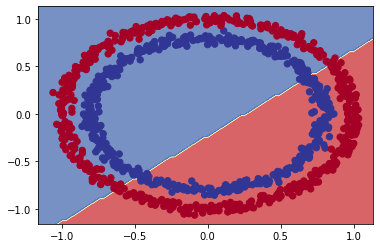

In [21]:
#check the prediction our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [22]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100,1100, 5) # y=X+100

#split the regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#fit our model to regression data
#model_3.fit(tf.expand_dims(X_reg_train, axis=-1) , y_reg_train, epochs=100)


In [23]:
#setup random seed
tf.random.set_seed(42)

#1. create a model
model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

#2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
                )

#3. fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

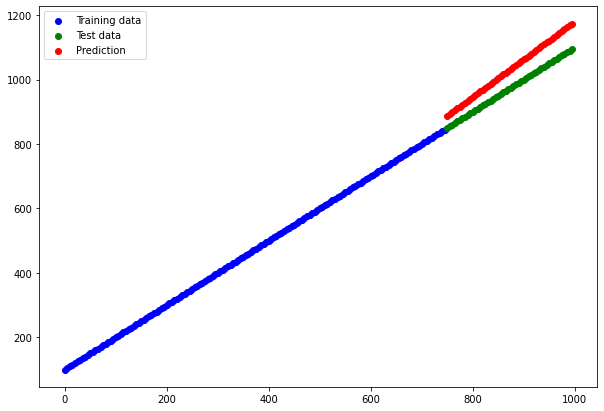

In [24]:
#make predictions with our trained model
y_reg_pred= model_3.predict(X_reg_test)

#plot the model prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Prediction")
plt.legend();

###The missing piece: Non-linearity

In [25]:
tf.random.set_seed(42)

#1. create the model
model_4=tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#2. compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. fit the model
history=model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.2732 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1783 - accuracy: 0.4965
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1319 - accuracy: 0.4972
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0867 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0225 - accuracy: 0.4967
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9695 - accuracy: 0.4982
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9023 - accuracy: 0.4988
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8551 - accuracy: 0.4972
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8040 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7407 - accuracy: 0.5006
Epoch 11/

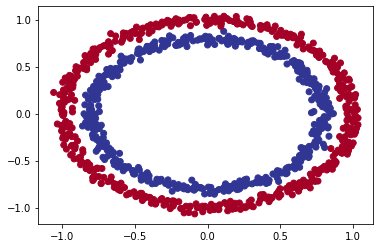

In [26]:
#check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [27]:
y.shape

(1000,)

create neural network with non-linear activation function

In [28]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [33]:
#time to replicate the multi-layer neural network from tensorflow playground
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
                            tf.keras.layers.Dense(4, activation="relu"),
                            tf.keras.layers.Dense(4, activation="relu"),
                            tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])
 
model_6.fit(X, y, epochs=250)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [30]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 2, 4)              8         
                                                                 
 dense_14 (Dense)            (None, 2, 4)              20        
                                                                 
 dense_15 (Dense)            (None, 2, 1)              5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_6.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x7f407adc4d90>>

doing binary classification


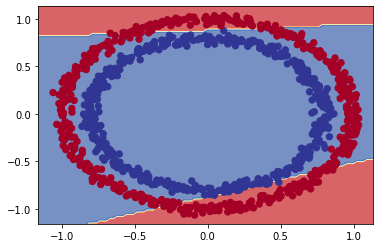

In [34]:
#y=np.reshape(100,100)
plot_decision_boundary(model=model_6, 
                       X=X, 
                       y=y)

In [35]:
#create model 7
tf.random.set_seed(42)

model_7=tf.keras.Sequential([
                            tf.keras.layers.Dense(4, activation="relu"),
                            tf.keras.layers.Dense(4, activation="relu"),
                            tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])
 
model_7.fit(X, y, epochs=250)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [39]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593363776803017, 0.9919999837875366]

doing binary classification


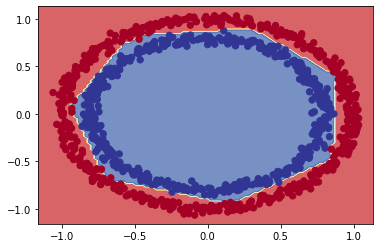

In [36]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [41]:
#create a toy tensor (similar to the data we pass into our model)
A=tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

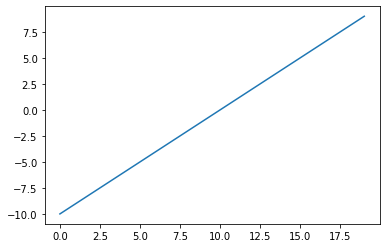

In [42]:
#Visualize our toy tensor
plt.plot(A)

In [44]:
#replicate sigmoid(x) = 1/ (1+exp(-x))
def sigmoid(x):
  return 1/ (1+tf.exp(-x))


In [45]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

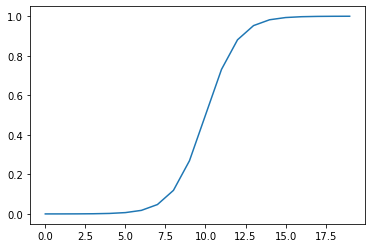

In [46]:
plt.plot(sigmoid(A))